# **0. Información Dataset**

---

## About this file:


This dataset contains job postings from Glassdoor.com from 2017-2018. This dataset includes features such as job title, salary estimate, job description, rating, company name, location, headquarters, size, founded, type of ownership, industry, sector, revenue, competitors compile a list of the most important features in this dataset. , hourly wage minima and maxima,, avg_salary,, num_comp,sdesc_len If you are looking for a job in the data science field then this is the dataset for you to explore!

**Job Title:** Title of the Job

**Salary Estimate:** Estimated salary for the job that the company provides

**Job Description:** The description of the job

**Rating:** Rating of the company

**Company Name:** Name of the Company

**Location:** Location of the job

**Headquarters:** Headquarters of the company

**Size:** Number of employees in the company

**Founded:** The year company founded

**Type of ownership:** Ownership types like private, public, government, and non-profit organizations

**Industry:** Industry type like Aerospace, Energy where the company provides services

**Sector:** Which type of services company provide in the industry, like industry (Energy), Sector (Oil, Gas)

**Revenue:** Total revenue of the company

**Competitors:** Company competitors

# **1. Importar Librerías**

---

In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not curr

In [166]:
import re
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler

# **2. Exploración de Datos**

---

## A. Cargar Datos

In [167]:
df = pd.read_csv("glassdoor_jobs.csv")
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## B. Información de Datos

No hay datos nulos o faltantes

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [169]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [170]:
df.describe(include = "object")

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
count,956,956,956,956,956,956,956,956,956,956,956,956
unique,328,417,596,448,237,235,9,13,63,25,14,149
top,Data Scientist,-1,Day Shift: 7A-330P. Holidays and every other w...,Novartis\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,178,214,4,14,78,75,177,532,148,239,299,634


## C. Inspeccionar Parámetro "Salary Estimate"

In [171]:
df["Salary Estimate"].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

Se deben eliminar estos datos con salario negativo

In [172]:
df[df["Salary Estimate"] == "-1"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
24,24,Data Scientist,-1,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,Oregon,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1
42,42,Data Scientist,-1,Take your career to new heights working with a...,4.1,Amount\n4.1,"Chicago, IL","Chicago, IL",201 to 500 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
47,47,Data Science Analyst,-1,Company Overview:\n\nBrightside is an employee...,5.0,Brightside\n5.0,"Chandler, AZ","San Francisco, CA",51 to 200 employees,2017,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1
53,53,Data Engineer,-1,"Data Engineer\n£50,000 – £70,000 See Advert\n\...",4.5,Anson McCade\n4.5,"Kingdom, IL","London, United Kingdom",51 to 200 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$1 to $5 million (USD),-1
64,64,Business Intelligence Analyst,-1,Business Intelligence Analyst\nAccounting\n50 ...,3.1,Amica Mutual\n3.1,"Lincoln, RI","Lincoln, RI",1001 to 5000 employees,1907,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),-1


In [173]:
df[df["Salary Estimate"] == "-1"].shape[0]

214

## D. Inspeccionar Parámetro "Rating"

Se pueden convertir a los valores a 0

In [174]:
df[df["Rating"] < 0.0].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
114,114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
121,121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
134,134,Data Platform Engineer,-1,"Geomagical Labs is developing mass-scale, visu...",-1.0,Geomagical Labs,"Mountain View, CA","Mountain View, CA",1 to 50 employees,-1,Company - Private,Internet,Information Technology,Less than $1 million (USD),-1
208,208,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1
214,214,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [175]:
df[df["Rating"] < 0.0].shape[0]

34

## E. Inspeccionar Parámetro "Location"

Parecen datos válidos y que todas las localidades son de USA

In [176]:
df["Location"].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

## F. Inspeccionar Parámetro "Size"

In [177]:
df["Size"].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

Se pueden convertir o eliminar estos valores

In [178]:
df[df["Size"] == "-1"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
405,405,Scientist – Cancer Drug Discovery,-1,Scientist – Cancer Drug Discovery\nLocation: C...,-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1
584,584,Scientist – Cancer Drug Discovery,-1,Scientist – Cancer Drug Discovery\nLocation: C...,-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1
618,618,Data Scientist,-1,This role requires you work closely with a var...,-1.0,WeRide.ai,"San Jose, CA",-1,-1,-1,-1,-1,-1,-1,-1
621,621,Data Scientist,-1,This is a post on behalf of a hiring partner.\...,-1.0,ODSC Hiring Partner,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1
628,628,Data Scientist,-1,About Our AI/ML Team\n\nOur mission is to buil...,-1.0,Point72 Ventures,"Palo Alto, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [179]:
df[df["Size"] == "-1"].shape[0]

11

In [180]:
df[df["Size"] == "Unknown"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
48,48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
214,214,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
345,345,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
472,472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
477,477,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1


In [181]:
df[df["Size"] == "Unknown"].shape[0]

15

## G. Inspeccionar Parámetro "Founded"

In [182]:
df["Founded"].unique()

array([1973, 1984, 2010, 1965, 1998, 2000, 2008, 2005, 2014, 2009, 2011,
       1968, 1962, 2012, 1781, 1995, 1915, 2013, 1935, 1911, 1849, 1952,
       1852, 1997, 1996, 1974, 1969, 1870, 1985, 2015,   -1, 1993, 2017,
       1958, 1986, 1999, 1925, 1912, 2002, 1863, 1939, 2016, 1907, 1885,
       2006, 1948, 2003, 1927, 1978, 1860, 1942, 2018, 1990, 1988, 2001,
       2007, 1992, 1994, 1977, 2019, 1982, 1937, 1878, 1966, 1971, 1943,
       1987, 1945, 1846, 1851, 1976, 1981, 1970, 1951, 1967, 1961, 2004,
       1964, 1930, 1917, 1883, 1887, 1850, 1890, 1902, 1744, 1929, 1947,
       1864, 1991, 1989, 1928, 1875, 1913, 1972, 1856, 1932, 1983, 1922,
       1812, 1914, 1980, 1954, 1830, 1975, 1858, 1899, 1979, 1889])

Se pueden eliminar

In [183]:
df[df["Founded"] <= 1000].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
43,43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1
48,48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
76,76,Data Scientist,$96K-$161K (Glassdoor est.),SummaryProvide data management and statistical...,3.2,"Numeric, LLC\n3.2","Philadelphia, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
114,114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
121,121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1


In [184]:
df[df["Founded"] <= 1000].shape[0]

97

## H. Inspeccionar Parámetro "Type of ownership"

In [185]:
df["Type of ownership"].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Contract', 'Unknown',
       'College / University', 'Private Practice / Firm', '-1',
       'School / School District'], dtype=object)

Se pueden eliminar

In [186]:
df[df["Type of ownership"] == "Unknown"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
114,114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
121,121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
143,143,Project Scientist,$29K-$50K (Glassdoor est.),Project Scientist\n\nJob Details\nLevel\nEntry...,4.0,Alliance Source Testing\n4.0,"Alabaster, AL","Decatur, AL",51 to 200 employees,2000,Unknown,Architectural & Engineering Services,Business Services,$25 to $50 million (USD),-1
238,238,Data Science Manager,-1,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
424,424,Data Science Manager,-1,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1


In [187]:
df[df["Type of ownership"] == "Unknown"].shape[0]

11

## I. Inspeccionar Parámetro "Industry"

In [188]:
df["Industry"].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Food & Beverage Manufacturing', 'Telecommunications Services',
       'IT Services', 'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing',
       'Investment Banking & Asset Management',
       'Industrial Manufacturing', 'Staffing & Outsourcing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Wholesale', 'Mining',
       'Financial Analytics & Research', 'Federal Agencies',
       'Educa

Se deben eliminar

In [189]:
df[df["Industry"] == "Unknown"]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [190]:
df[df["Industry"].apply(lambda x: len(x) <= 5)].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
43,43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1
114,114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
121,121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
149,149,Senior Data Scientist,-1,Our Mission\n\nWe make it fly! Join us and bui...,3.6,My Job Tank\n3.6,"San Francisco, CA","New York, NY",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
214,214,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [191]:
df[df["Industry"].apply(lambda x: len(x) <= 5)]["Industry"].unique()

array(['-1'], dtype=object)

In [192]:
df[df["Industry"].apply(lambda x: len(x) <= 5)].shape[0]

39

## J. Inspeccionar Parámetro "Sector"

In [193]:
df["Sector"].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Manufacturing', 'Telecommunications', '-1', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

Parecen ser los mismos que no tienen un "Industry", se pueden eliminar

In [194]:
df[df["Sector"] == "-1"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
43,43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1
114,114,Data Scientist,-1,Company Description\n\nFounded in Silicon Vall...,-1.0,Bridgerock Data,"Gainesville, FL","Gainesville, FL",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
121,121,Postdoc Scientist - T cell engineering,-1,Postdoctoral Scientist – CAR-T cell engineerin...,-1.0,LEAH Labs,"Rochester, MN","Rochester, MN",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1
149,149,Senior Data Scientist,-1,Our Mission\n\nWe make it fly! Join us and bui...,3.6,My Job Tank\n3.6,"San Francisco, CA","New York, NY",51 to 200 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1
214,214,Data Scientist,-1,With one application you can be considered for...,-1.0,Seen by Indeed,"Pittsburgh, PA","Austin, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [195]:
df[df["Sector"] == "-1"].shape[0]

39

## K. Inspeccionar Parámetro "Revenue"

In [196]:
df["Revenue"].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

Parecen datos válidos e importantes

In [197]:
df[df["Revenue"] == "Unknown / Non-Applicable"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
13,13,Data Analyst,$46K-$85K (Glassdoor est.),"Are you an experienced Data Analyst, skilled a...",4.1,Yesler\n4.1,"Seattle, WA","Seattle, WA",201 to 500 employees,2012,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
15,15,Data Engineer I,$102K-$190K (Glassdoor est.),This opportunity is within Audibles Data Engin...,3.6,Audible\n3.6,"Newark, NJ","Newark, NJ",1001 to 5000 employees,1995,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,Unknown / Non-Applicable,-1
17,17,Customer Data Scientist,$118K-$189K (Glassdoor est.),Company Overview\n\nH2O.ai is the open source ...,4.3,h2o.ai\n4.3,"Mountain View, CA","Mountain View, CA",201 to 500 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1


In [198]:
df[df["Revenue"] == "Unknown / Non-Applicable"].shape[0]

299

Estos datos se deben eliminar

In [199]:
df[df["Revenue"] == "-1"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
405,405,Scientist – Cancer Drug Discovery,-1,Scientist – Cancer Drug Discovery\nLocation: C...,-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1
584,584,Scientist – Cancer Drug Discovery,-1,Scientist – Cancer Drug Discovery\nLocation: C...,-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1
618,618,Data Scientist,-1,This role requires you work closely with a var...,-1.0,WeRide.ai,"San Jose, CA",-1,-1,-1,-1,-1,-1,-1,-1
621,621,Data Scientist,-1,This is a post on behalf of a hiring partner.\...,-1.0,ODSC Hiring Partner,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1
628,628,Data Scientist,-1,About Our AI/ML Team\n\nOur mission is to buil...,-1.0,Point72 Ventures,"Palo Alto, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [200]:
df[df["Revenue"] == "-1"].shape[0]

11

## L. Inspeccionar Parámetro "Competitors"

Solo existe un valor raro (-1), puede significar que no tiene competidores

In [201]:
df["Competitors"].unique()

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

Son datos importantes

In [202]:
df[df["Competitors"] == "-1"].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1


In [203]:
df[df["Competitors"] == "-1"].shape[0]

634

## M. Inspeccionar Parámetro "Job Title"

No parece que existan datos inválidos

In [204]:
df["Job Title"].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

## N. Inspeccionar Parámetro "Company Name"

Parece que se agregó al nombre el valor del "rating"

In [205]:
df["Company Name"].unique()

array(['Tecolote Research\n3.8',
       'University of Maryland Medical System\n3.4', 'KnowBe4\n4.8',
       'PNNL\n3.8', 'Affinity Solutions\n2.9', 'CyrusOne\n3.4',
       'ClearOne Advantage\n4.1', 'Logic20/20\n3.8',
       'Rochester Regional Health\n3.3', '<intent>\n4.6', 'Wish\n3.5',
       'ManTech\n4.1', 'Walmart\n3.2', 'Yesler\n4.1',
       'Takeda Pharmaceuticals\n3.7', 'Audible\n3.6',
       'Blueprint Medicines\n3.9', 'h2o.ai\n4.3', 'Nuna\n4.2',
       'Pinnacol Assurance\n4.0', 'Porch\n3.2', 'Health IQ\n3.9',
       'Truckstop.com\n3.8', 'SMC 3\n4.3', 'Mars\n3.9', 'Novetta\n4.0',
       'Pfizer\n4.0', 'First Tech Federal Credit Union\n3.5',
       'The Hanover Insurance Group\n3.7', 'Amrock\n3.6', 'Novartis\n3.8',
       'Juniper Networks\n3.8', 'New England Biolabs\n4.7',
       'Clarity Insights\n4.2', 'Esri\n3.5',
       'Systems & Technology Research\n4.7', 'Sartorius\n3.5',
       'Lancer Insurance\n3.5', 'Sauce Labs\n4.2', 'Amount\n4.1',
       'Persivia\n3.6', 'Edgew

# **3. Limpieza de Datos**

---

In [206]:
cleaned_df = df.copy()

## A. Limpiar Parámetro "Salary Estimate"

In [207]:
cleaned_df["Salary Estimate"] = cleaned_df["Salary Estimate"].astype("str")
mask = ~cleaned_df["Salary Estimate"].isin(["-1"])
cleaned_df = cleaned_df[mask]
cleaned_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## B. Limpiar Parámetro "Size"

In [208]:
cleaned_df["Size"] = cleaned_df["Size"].astype("str")
mask = (
    (cleaned_df["Size"].str.match("^Unknown$") == False) &
    (cleaned_df["Size"].str.match("^-1$") == False)
)
cleaned_df = cleaned_df[mask]
cleaned_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## C. Limpiar Parámetro "Founded"

In [209]:
mask = cleaned_df["Founded"] != -1
cleaned_df = cleaned_df[mask]
cleaned_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## D. Limpiar Parámetro "Type of ownership"

In [210]:
cleaned_df["Type of ownership"] = cleaned_df["Type of ownership"].astype("str")
mask = ~cleaned_df["Type of ownership"].isin(["Unknown"])
cleaned_df = cleaned_df[mask]
cleaned_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## E. Limpiar Parámetro "Industry"

Ya se eliminaron

In [211]:
cleaned_df[cleaned_df["Industry"] == "-1"].shape[0]

0

## F. Limpiar Parámetro "Sector"

Ya se eliminaron

In [212]:
cleaned_df[cleaned_df["Sector"] == "-1"].shape[0]

0

## G. Limpiar Parámetro "Revenue"

Ya se eliminaron

In [213]:
cleaned_df[cleaned_df["Revenue"] == "-1"].shape[0]

0

## H. Contabilizar Datos Limpiados

In [214]:
print("Se limpiaron {} registros, lo cual representa el {}% de los registros originales.".format(
    df.shape[0] - cleaned_df.shape[0],
    round((1 - cleaned_df.shape[0]/df.shape[0]) * 100, 4)
    ))

Se limpiaron 265 registros, lo cual representa el 27.7197% de los registros originales.


# **4. Conversión de Datos**

---

In [215]:
converted_df = cleaned_df.copy()

## A. Convertir Variable "Job Title"

### Opción LLM (Falta Arreglar)

In [ ]:
compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_quant_type = "nf4",
    bnb_4bit_compute_dtype = compute_dtype,
    bnb_4bit_use_double_quant = False,
)

In [ ]:
model_name = "NousResearch/Llama-2-7b-chat-hf"
model = AutoModelForCausalLM.from_pretrained(model_name, quantization_config = bnb_config, device_map = {"": 0})
model.config.use_cache = False
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code = True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

In [ ]:
classifier = pipeline(task = "text-generation", model = model, tokenizer = tokenizer, max_length = 200)

Tengo que buscar un mejor prompt para un modelo no tan listo, o ver una forma de usar un modelo más listo que este.

In [ ]:
def etiquetar_puestos_llm(job_title):
  prompt = "Please categorize the following job title: '{}' into a general label. Provide just the best label for that job title, answer only with a emoji. Answer: ".format(job_title)
  response = classifier(prompt, num_return_sequences = 1)[0]["generated_text"]
  if "Answer:" in response:
    etiqueta = response.split("Answer: ")[1].strip()
  else:
    etiqueta = response.strip()
  return etiqueta

df_sample = converted_df.head(15).copy()
converted_df["General Job Title"] = converted_df["Job Title"].apply(etiquetar_puestos_llm)

In [ ]:
converted_df["General Job Title"].unique()

In [ ]:
converted_df[converted_df["General Job Title"] == "🔢"]

### Opción Normal

In [218]:
def rename_title(title):
  title = title.lower()
  if "analyst" in title:
    return "Data Analyst"
  elif "data scientist" in title:
    return "Data Scientist"
  elif "data engineer" in title:
    return "Data Engineer"
  elif "machine learning" in title:
    return "Machine Learning Engineer"
  elif "big data" in title:
    return "Big Data Engineer"
  elif "research" in title:
    return "Research Scientist"
  elif "software" in title:
    return "Software Engineer"
  elif "director" in title:
    return "Director"
  elif "manager" in title:
    return "Manager"
  else:
    return "Other"

In [219]:
converted_df["New Job Title"] = converted_df["Job Title"].apply(rename_title)
converted_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist


In [220]:
converted_df["New Job Title"].unique()

array(['Data Scientist', 'Research Scientist', 'Data Analyst',
       'Data Engineer', 'Other', 'Director', 'Manager',
       'Machine Learning Engineer', 'Software Engineer'], dtype=object)

In [221]:
converted_df[converted_df["New Job Title"] == "Other"]["Job Title"].size

147

In [222]:
converted_df["New Job Title"].value_counts()

,count
New Job Title,
Data Scientist,263
Other,147
Data Engineer,108
Data Analyst,99
Machine Learning Engineer,22
Manager,19
Research Scientist,15
Director,14
Software Engineer,4


## B. Convertir Variable "Salary Estimate"

Convertir todos los valores de salarios a anuales

In [223]:
def calculate_salary(salary, multiplier):
  numbers = re.findall(r"\d+", salary)
  numbers[0] = int(int(numbers[0]) * multiplier)
  numbers[1] = int(int(numbers[1]) * multiplier)
  return (numbers[1] + numbers[0]) / 2

def salary_estimate(salary):
  salary = salary.lower()
  if "per hour" in salary:
    return calculate_salary(salary, 1.920)
  return calculate_salary(salary, 1)

In [224]:
converted_df["Salary Estimate"] = converted_df["Salary Estimate"].apply(salary_estimate)
converted_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist


## C. Convertir Variable "Rating"

In [225]:
converted_df["Rating"] = converted_df["Rating"].apply(lambda x : max(x, 0.0))

In [226]:
converted_df[converted_df["Rating"] == 0.0].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title
208,208,Principal Data Scientist with over 10 years ex...,225.0,Position Title: Principal Data Scientist\nLoca...,0.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,Data Scientist
331,331,Principal Data Scientist with over 10 years ex...,225.0,Position Title: Principal Data Scientist\nLoca...,0.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,Data Scientist


## D. Convertir Variable "Company Name"

In [227]:
converted_df["Company Name"] = converted_df["Company Name"].str.replace("\n\d+\.\d+", "", regex=True)
converted_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Data Scientist
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,Data Scientist
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,Data Scientist
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist


## E. Convertir Variable "Competitors"

In [228]:
converted_df["Competitors"] = converted_df["Competitors"].str.replace("-1", "")
converted_df[converted_df["Competitors"] == ""].head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),,Data Scientist
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),,Data Scientist
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),,Data Scientist
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,,Data Scientist
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),,Data Scientist


# **5. Agregar Valores Importantes**

___

In [229]:
aggregated_df = converted_df.copy()

## A. Agregar Nivel del Puesto de Trabajo

In [230]:
def level(title):
  title = title.lower()
  if "senior" in title or "sr" in title or "principal" in title or "lead" in title:
    return "Senior"
  elif "junior" in title or "jr" in title:
    return "Junior"
  else:
    return "Not Specified"

In [231]:
aggregated_df["Level"] = aggregated_df["Job Title"].apply(level)
aggregated_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title,Level
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),,Data Scientist,Not Specified
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),,Data Scientist,Not Specified
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),,Data Scientist,Not Specified
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not Specified
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not Specified


## B. Calcular Número de "Competitors"

In [232]:
aggregated_df["Number Competitors"] = aggregated_df["Competitors"].apply(lambda x : len(x.split(",")) if x else 0)
aggregated_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title,Level,Number Competitors
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),,Data Scientist,Not Specified,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),,Data Scientist,Not Specified,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),,Data Scientist,Not Specified,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not Specified,3
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not Specified,3


## C. Agregar el Estado de la "Location"

In [233]:
aggregated_df["State"] = aggregated_df["Location"].apply(lambda x : x.split(",")[1])
aggregated_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title,Level,Number Competitors,State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),,Data Scientist,Not Specified,0,NM
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),,Data Scientist,Not Specified,0,MD
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),,Data Scientist,Not Specified,0,FL
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not Specified,3,WA
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not Specified,3,NY


In [234]:
aggregated_df["State"].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' OH', ' AL',
       ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' DC', ' NC', ' AZ',
       ' NE', ' MN', ' Los Angeles', ' TN', ' DE', ' UT', ' ID', ' RI',
       ' IA', ' SC', ' KS'], dtype=object)

## D. Obtener Antiguedad de "Company"

In [235]:
aggregated_df["Age"] = aggregated_df["Founded"].apply(lambda x : 2025 - x)
aggregated_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,New Job Title,Level,Number Competitors,State,Age
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),,Data Scientist,Not Specified,0,NM,52
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),,Data Scientist,Not Specified,0,MD,41
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),,Data Scientist,Not Specified,0,FL,15
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",Data Scientist,Not Specified,3,WA,60
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist,Not Specified,3,NY,27


## E. Extraer Datos Importantes de "Job Description"

### Opción LLM (Falta Hacer)

Primero solucionar el otro

### Opción Normal

In [236]:
aggregated_df["Python"] = aggregated_df["Job Description"].apply(lambda x : 1 if "python" in x.lower() else 0)
aggregated_df["SQL"] = aggregated_df["Job Description"].apply(lambda x : 1 if "sql" in x.lower() else 0)
aggregated_df["Data Analysis"] = aggregated_df["Job Description"].apply(lambda x : 1 if "data analysis" in x.lower() else 0)
aggregated_df["Data Visualization"] = aggregated_df["Job Description"].apply(lambda x : 1 if "data visualization" in x.lower() else 0)
aggregated_df["Big Data"] = aggregated_df["Job Description"].apply(lambda x : 1 if "big data" in x.lower() else 0)
aggregated_df["Statistical Analysis"] = aggregated_df["Job Description"].apply(lambda x : 1 if "statistical analysis" in x.lower() else 0)
aggregated_df["ETL"] = aggregated_df["Job Description"].apply(lambda x : 1 if "etl" in x.lower() else 0)
aggregated_df["Data Cleaning"] = aggregated_df["Job Description"].apply(lambda x : 1 if "data cleaning" in x.lower() else 0)
aggregated_df["Data Modeling"] = aggregated_df["Job Description"].apply(lambda x : 1 if "data modeling" in x.lower() else 0)
aggregated_df["Data Mining"] = aggregated_df["Job Description"].apply(lambda x : 1 if "data mining" in x.lower() else 0)
aggregated_df["Machine Learning"] = aggregated_df["Job Description"].apply(lambda x : 1 if "machine learning" in x.lower() else 0)
aggregated_df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,SQL,Data Analysis,Data Visualization,Big Data,Statistical Analysis,ETL,Data Cleaning,Data Modeling,Data Mining,Machine Learning
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,1,1,0,0,0,0,0,1,1
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,0,1,0,1,0,0,0,0,1
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,1,1,1,1,0,0,0,1,1,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,0,1,0,0,0,0,0,1,0,1
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,1,0,0,0,1,0,0,0,0,1


# **6. Reducción de Dimensionalidad**

---

In [237]:
reducted_df = aggregated_df.copy()

## A. Eliminar Columnas Innecesarias

In [238]:
reducted_df = reducted_df.drop(["Unnamed: 0", "Job Title", "Job Description", "Location", "Headquarters", "Founded", "Competitors"], axis = 1)
reducted_df.columns

Index(['Salary Estimate', 'Rating', 'Company Name', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'New Job Title',
       'Level', 'Number Competitors', 'State', 'Age', 'Python', 'SQL',
       'Data Analysis', 'Data Visualization', 'Big Data',
       'Statistical Analysis', 'ETL', 'Data Cleaning', 'Data Modeling',
       'Data Mining', 'Machine Learning'],
      dtype='object')

## B. Obtener Datos Atípicos

### B.1. Variable "Rating"

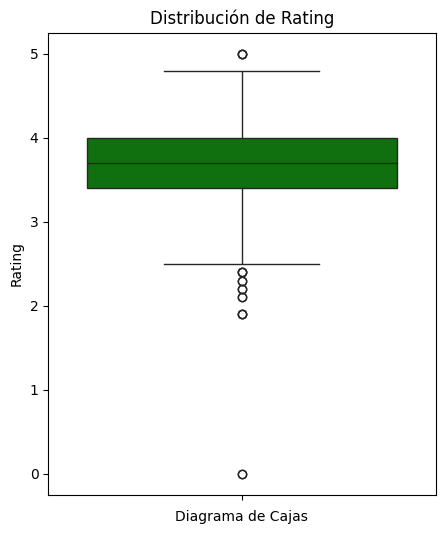

In [239]:
plt.figure(figsize = (5, 6))
sns.boxplot(reducted_df["Rating"], color = "Green")
plt.title("Distribución de Rating")
plt.xlabel("Diagrama de Cajas")
plt.show()

In [240]:
R_Q1 = reducted_df["Rating"].quantile(0.25)
R_Q3 = reducted_df["Rating"].quantile(0.75)
R_IQR = R_Q3 - R_Q1

rating_outliers_df = reducted_df[(reducted_df["Rating"] < R_Q1 - 1.5 * R_IQR) | (reducted_df["Rating"] > R_Q3 + 1.5 * R_IQR)].copy()
rating_outliers_df.describe()

,Salary Estimate,Rating,Number Competitors,Age,Python,SQL,Data Analysis,Data Visualization,Big Data,Statistical Analysis,ETL,Data Cleaning,Data Modeling,Data Mining,Machine Learning
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0,17.000000,17.000000
mean,105.352941,2.417647,0.764706,18.882353,0.352941,0.411765,0.529412,0.058824,0.235294,0.294118,0.058824,0.0,0.0,0.176471,0.294118
std,49.413676,1.432321,1.251470,8.410428,0.492592,0.507300,0.514496,0.242536,0.437237,0.469668,0.242536,0.0,0.0,0.392953,0.469668
min,62.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,72.500000,1.900000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
50%,87.500000,2.200000,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
75%,110.000000,2.400000,2.000000,22.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000
max,225.000000,5.000000,3.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


### B.2. Variable "Number Competitors"

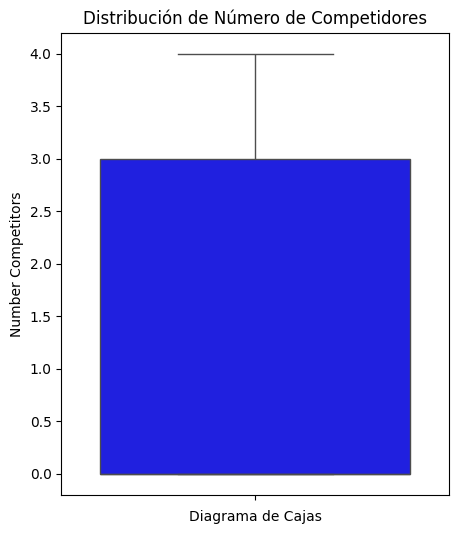

In [241]:
plt.figure(figsize = (5, 6))
sns.boxplot(reducted_df["Number Competitors"], color = "Blue")
plt.title("Distribución de Número de Competidores")
plt.xlabel("Diagrama de Cajas")
plt.show()

### B.3. Variable "Age"

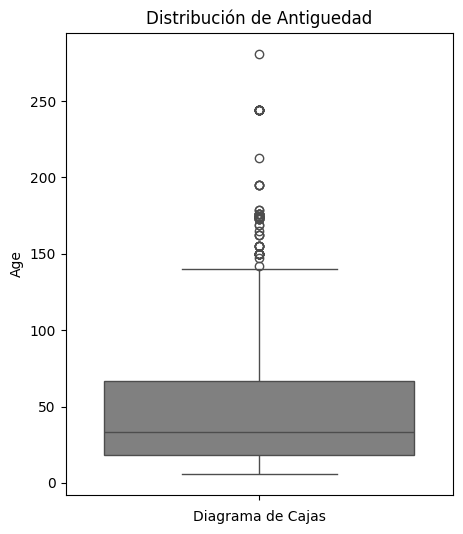

In [242]:
plt.figure(figsize = (5, 6))
sns.boxplot(reducted_df["Age"], color = "gray")
plt.title("Distribución de Antiguedad")
plt.xlabel("Diagrama de Cajas")
plt.show()

In [243]:
A_Q1 = reducted_df["Age"].quantile(0.25)
A_Q3 = reducted_df["Age"].quantile(0.75)
A_IQR = A_Q3 - A_Q1

age_outliers_df = reducted_df[(reducted_df["Age"] > A_Q3 + 1.5 * A_IQR) | (reducted_df["Age"] < A_Q1 - 1.5 * A_IQR)].copy()
age_outliers_df.describe()

,Salary Estimate,Rating,Number Competitors,Age,Python,SQL,Data Analysis,Data Visualization,Big Data,Statistical Analysis,ETL,Data Cleaning,Data Modeling,Data Mining,Machine Learning
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,105.740260,3.558442,0.935065,182.649351,0.376623,0.311688,0.285714,0.025974,0.090909,0.077922,0.038961,0.025974,0.012987,0.064935,0.337662
std,33.587926,0.283934,1.398662,34.451249,0.487717,0.466221,0.454716,0.160101,0.289365,0.269807,0.194771,0.160101,0.113961,0.248027,0.476014
min,47.500000,3.100000,0.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.500000,3.400000,0.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,3.600000,0.000000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,129.500000,3.700000,3.000000,195.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,172.000000,4.000000,3.000000,281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## C. Quitar Datos Atípicos

In [244]:
non_outliers_df = reducted_df[(~reducted_df.index.isin(rating_outliers_df.index)) & (~reducted_df.index.isin(age_outliers_df.index))]
non_outliers_df.describe()

,Salary Estimate,Rating,Number Competitors,Age,Python,SQL,Data Analysis,Data Visualization,Big Data,Statistical Analysis,ETL,Data Cleaning,Data Modeling,Data Mining,Machine Learning
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,100.689280,3.745561,1.165829,39.649916,0.567839,0.547739,0.266332,0.169179,0.197655,0.082077,0.159129,0.020101,0.102178,0.128978,0.450586
std,38.394939,0.533069,1.407425,29.307323,0.495792,0.498133,0.442410,0.375225,0.398564,0.274712,0.366103,0.140462,0.303136,0.335457,0.497970
min,15.500000,2.500000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.500000,3.400000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.000000,3.800000,0.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122.500000,4.100000,3.000000,56.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,254.000000,4.800000,4.000000,140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


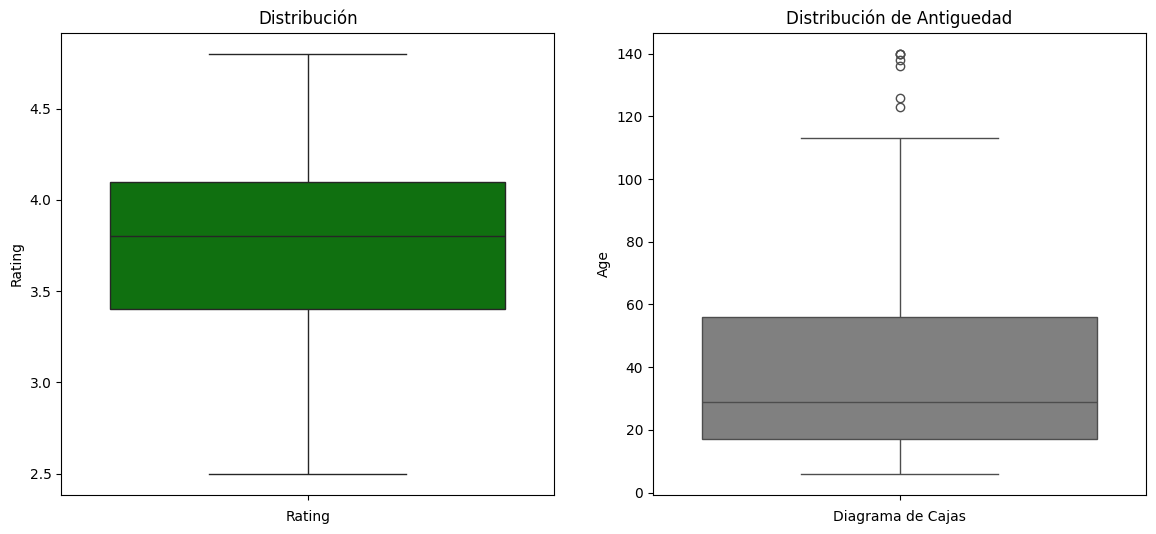

In [245]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(non_outliers_df["Rating"], color = "Green")
plt.title("Distribución")
plt.xlabel("Rating")

plt.subplot(1, 2, 2)
sns.boxplot(non_outliers_df["Age"], color = "gray")
plt.title("Distribución de Antiguedad")
plt.xlabel("Diagrama de Cajas")

plt.show()

# **7. Exploración de Datos Limpios**

___

## A. Variable "Rating"

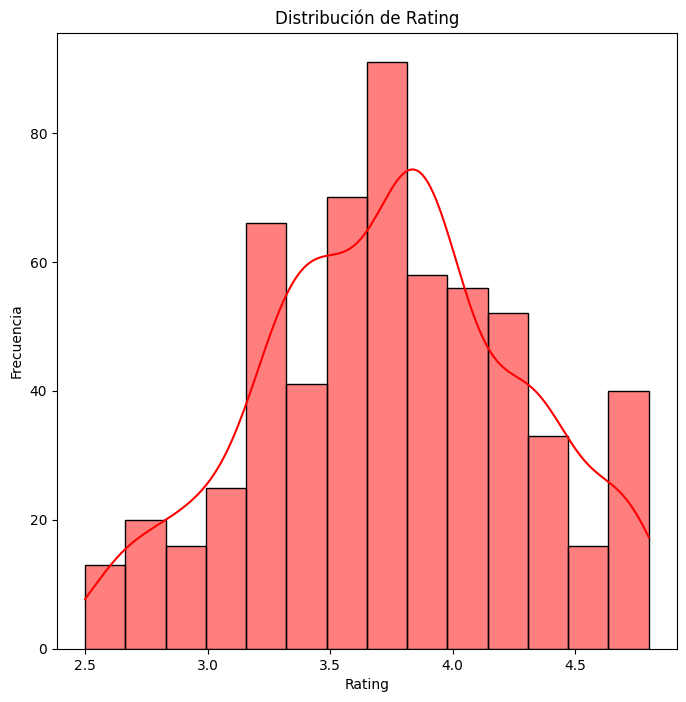

In [246]:
plt.figure(figsize = (8, 8))
sns.histplot(non_outliers_df["Rating"], kde = True, color = "Red")
plt.title("Distribución de Rating")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

## B. Variable "Company Name"

Es normal que aparezca una compañia dedicada a software en primer lugra, puesto a que la base de datos son mayormente de empleos dedicados a la tecnología.

<ipython-input-247-c5bb534fe1d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "Company Name", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
<ipython-input-247-c5bb534fe1d4>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(y = "Company Name", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))


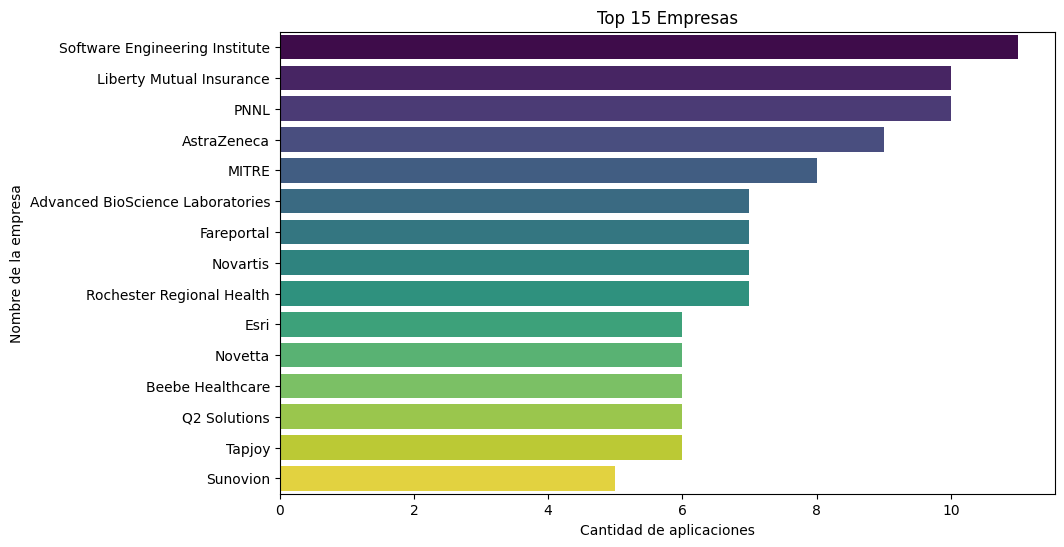

In [247]:
plt.figure(figsize = (10, 6))
cmap = plt.get_cmap("viridis")
order = non_outliers_df["Company Name"].value_counts().index[:15]
sns.countplot(y = "Company Name", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
plt.title("Top 15 Empresas")
plt.xlabel("Cantidad de aplicaciones")
plt.ylabel("Nombre de la empresa")
plt.show()

## C. Variable "Size"

Del que menos datos hay en comparación es el de "1 a 50 empleados".

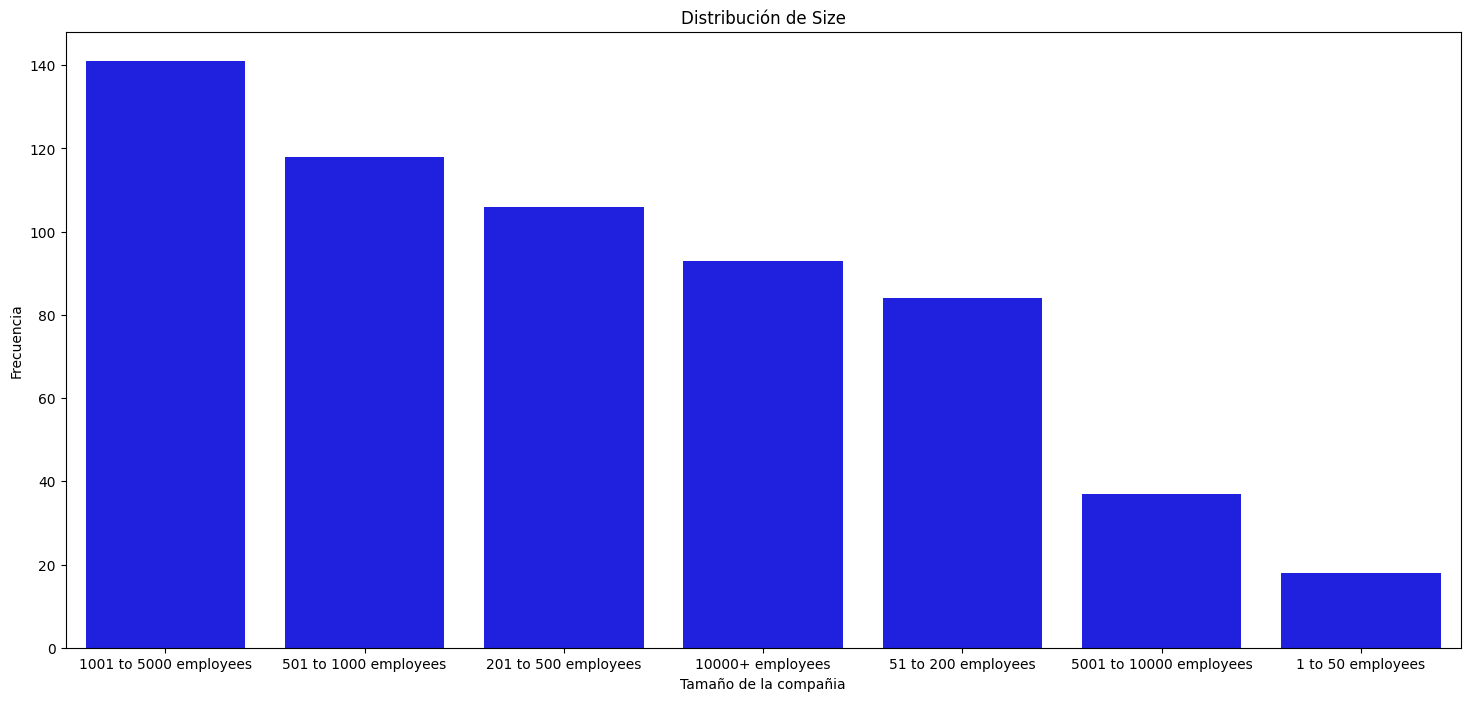

In [248]:
plt.figure(figsize = (18, 8))
sns.barplot(x = non_outliers_df["Size"].value_counts().index, y = non_outliers_df["Size"].value_counts(), color = "Blue")
plt.title("Distribución de Size")
plt.xlabel("Tamaño de la compañia")
plt.ylabel("Frecuencia")
plt.show()

## D. Variable "Type of ownership"

Gana y por mucho en cantidad las compañías privadas.

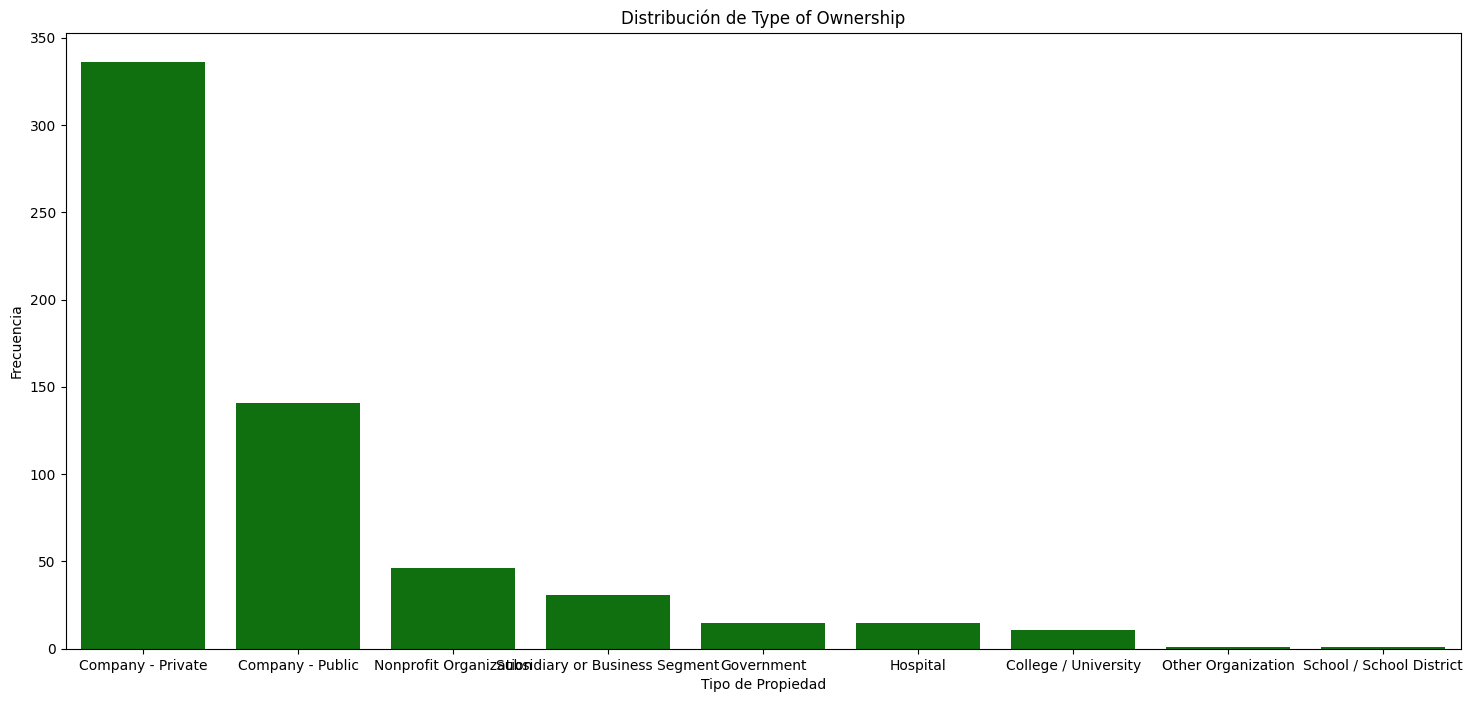

In [249]:
plt.figure(figsize = (18, 8))
sns.barplot(x = non_outliers_df["Type of ownership"].value_counts().index, y = non_outliers_df["Type of ownership"].value_counts(), color = "Green")
plt.title("Distribución de Type of Ownership")
plt.xlabel("Tipo de Propiedad")
plt.ylabel("Frecuencia")
plt.show()

## E. Variable "Industry"

<ipython-input-250-06dab20f1b28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "Industry", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
<ipython-input-250-06dab20f1b28>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(y = "Industry", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))


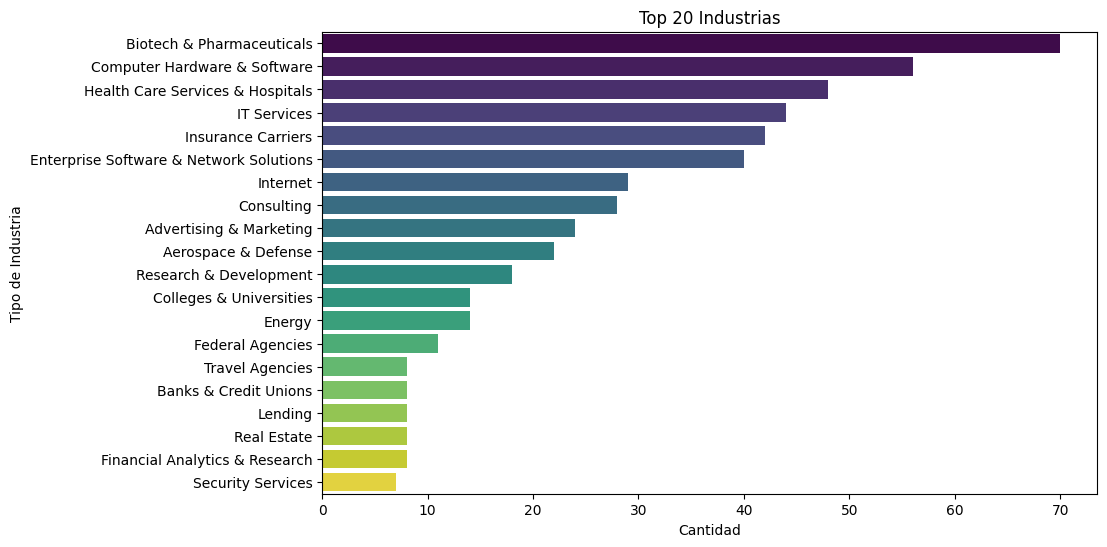

In [250]:
plt.figure(figsize = (10, 6))
cmap = plt.get_cmap("viridis")
order = non_outliers_df["Industry"].value_counts().index[:20]
sns.countplot(y = "Industry", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
plt.title("Top 20 Industrias")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Industria")
plt.show()

## F. Variable "Sector"

<ipython-input-251-bbbaecd9fd6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "Sector", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
<ipython-input-251-bbbaecd9fd6c>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(y = "Sector", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))


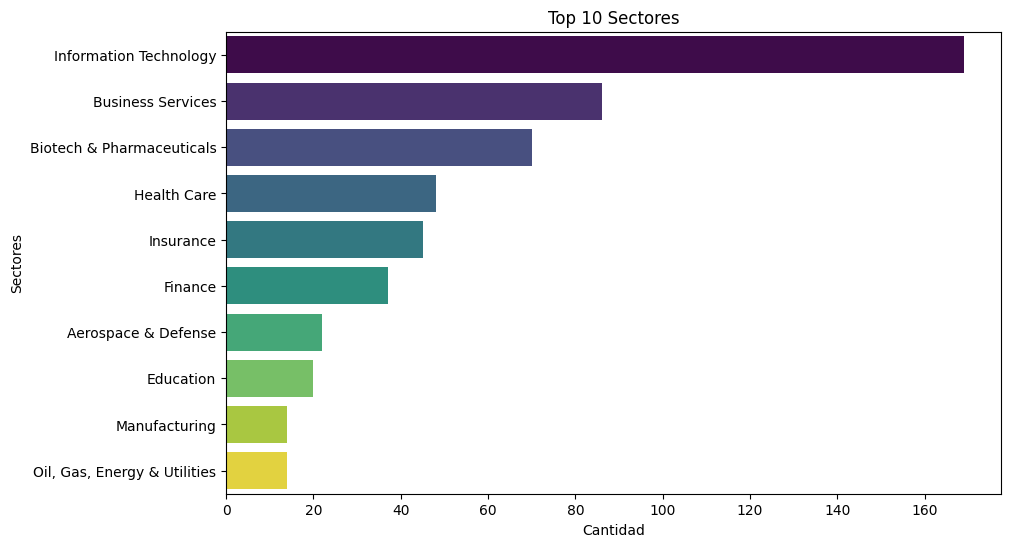

In [251]:
plt.figure(figsize = (10, 6))
cmap = plt.get_cmap("viridis")
order = non_outliers_df["Sector"].value_counts().index[:10]
sns.countplot(y = "Sector", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
plt.title("Top 10 Sectores")
plt.xlabel("Cantidad")
plt.ylabel("Sectores")
plt.show()

## G. Variable "Revenue"

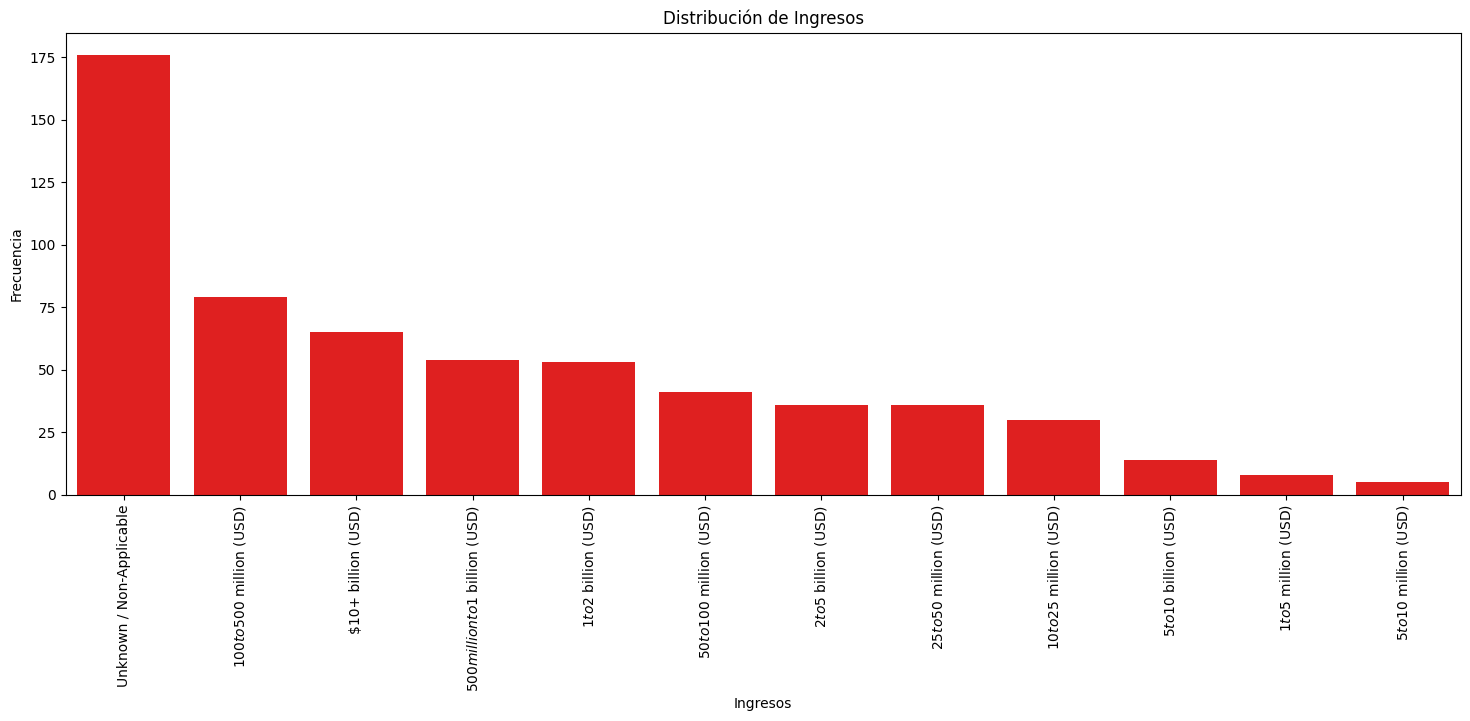

In [252]:
plt.figure(figsize = (18, 6))
sns.barplot(x = non_outliers_df["Revenue"].value_counts().index, y = non_outliers_df["Revenue"].value_counts(), color = "Red")
plt.title("Distribución de Ingresos")
plt.xlabel("Ingresos")
plt.xticks(rotation = 90)
plt.ylabel("Frecuencia")
plt.show()

## H. Variable "New Job Title"

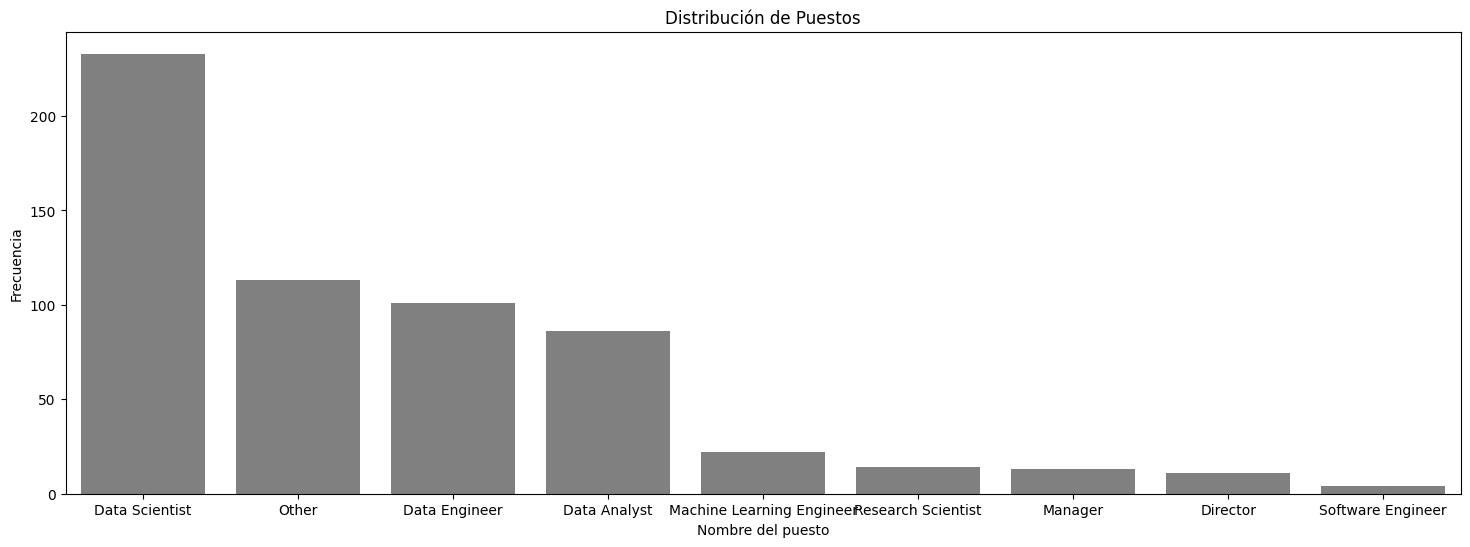

In [253]:
plt.figure(figsize = (18, 6))
sns.barplot(x = non_outliers_df["New Job Title"].value_counts().index, y = non_outliers_df["New Job Title"].value_counts(), color = "Gray")
plt.title("Distribución de Puestos")
plt.xlabel("Nombre del puesto")
plt.ylabel("Frecuencia")
plt.show()

## I. Variable "Level"

Hay muchos que no especifican el nivel que se requiere en el título.

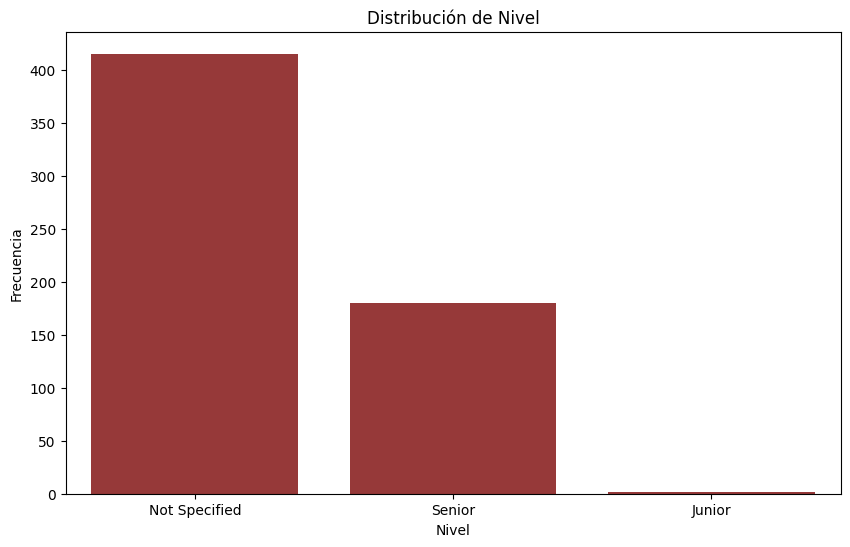

In [254]:
plt.figure(figsize = (10, 6))
sns.barplot(x = non_outliers_df["Level"].value_counts().index, y = non_outliers_df["Level"].value_counts(), color = "Brown")
plt.title("Distribución de Nivel")
plt.xlabel("Nivel")
plt.ylabel("Frecuencia")
plt.show()

## J. Variable "Number Competitors"

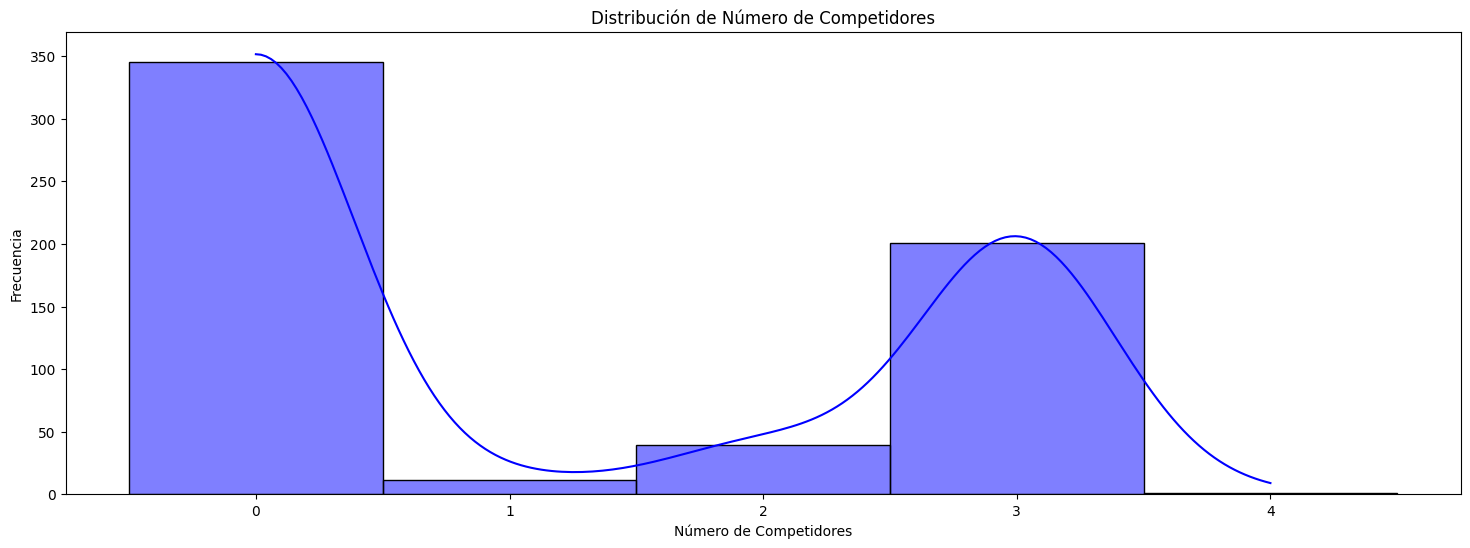

In [255]:
plt.figure(figsize = (18, 6))
sns.histplot(non_outliers_df["Number Competitors"], kde = True, color = "Blue", discrete = True)
plt.title("Distribución de Número de Competidores")
plt.xlabel("Número de Competidores")
plt.ylabel("Frecuencia")
plt.show()

## K. Variable "State"

<ipython-input-256-c02eda108a42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "State", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
<ipython-input-256-c02eda108a42>:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(y = "State", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))


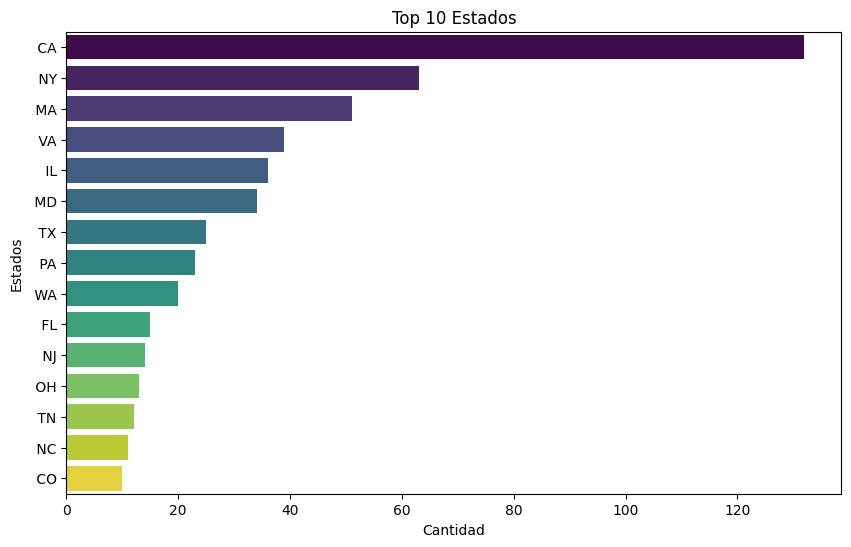

In [256]:
plt.figure(figsize = (10, 6))
cmap = plt.get_cmap("viridis")
order = non_outliers_df["State"].value_counts().index[:15]
sns.countplot(y = "State", data = non_outliers_df, order = order, palette = cmap(np.linspace(0, 1, len(order))))
plt.title("Top 10 Estados")
plt.xlabel("Cantidad")
plt.ylabel("Estados")
plt.show()

## L. Variable "Age"

Parece que la mayor cantidad de empresas rondan entre los 20 años de antiguedad.

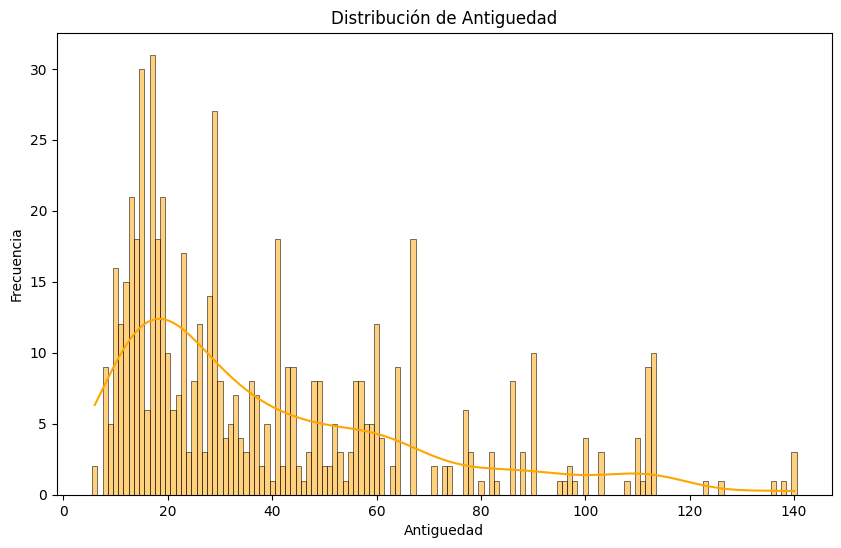

In [257]:
plt.figure(figsize = (10, 6))
sns.histplot(non_outliers_df["Age"], kde = True, color = "Orange", discrete = True)
plt.title("Distribución de Antiguedad")
plt.xlabel("Antiguedad")
plt.ylabel("Frecuencia")
plt.show()

## M. Variable "Salary Estimate"

La distribución del salario está rondando con más frecuencia aproximadamente entre los ~[60k - 120k] dólares anuales.

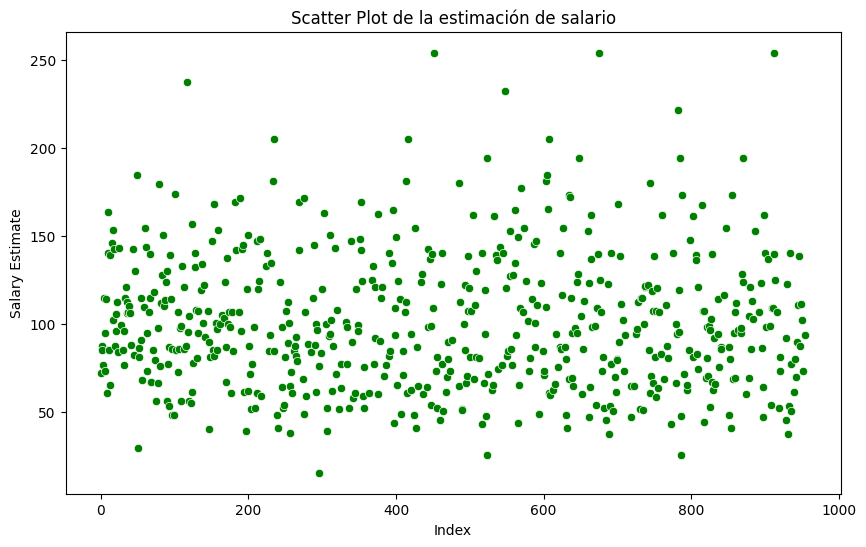

In [297]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = non_outliers_df.index, y = non_outliers_df["Salary Estimate"], color = "Green")
plt.title("Scatter Plot de la estimación de salario")
plt.xlabel("Index")
plt.ylabel("Salary Estimate")
plt.show()

# **8. Transformación de Datos**

---

In [259]:
encoded_df = non_outliers_df.copy()

## A. Convertir Valores Categóricos a Numéricos

In [260]:
label_encoders = {}

categorical_columns = encoded_df.select_dtypes(include=["object"]).columns

for column in categorical_columns:
  label_encoders[column] = LabelEncoder()
  encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])

In [261]:
encoded_df.head(5)

,Salary Estimate,Rating,Company Name,Size,Type of ownership,Industry,Sector,Revenue,New Job Title,Level,...,SQL,Data Analysis,Data Visualization,Big Data,Statistical Analysis,ETL,Data Cleaning,Data Modeling,Data Mining,Machine Learning
0,72.0,3.8,249,5,1,1,0,9,2,1,...,0,1,1,0,0,0,0,0,1,1
1,87.5,3.4,268,1,6,24,10,5,2,1,...,0,0,1,0,1,0,0,0,0,1
2,85.0,4.8,142,5,1,39,4,4,2,1,...,1,1,1,1,0,0,0,1,1,1
3,76.5,3.8,186,2,3,14,17,10,2,1,...,0,1,0,0,0,0,0,1,0,1
4,114.5,2.9,12,6,1,0,4,11,2,1,...,1,0,0,0,1,0,0,0,0,1


## B. Matriz de Correlación

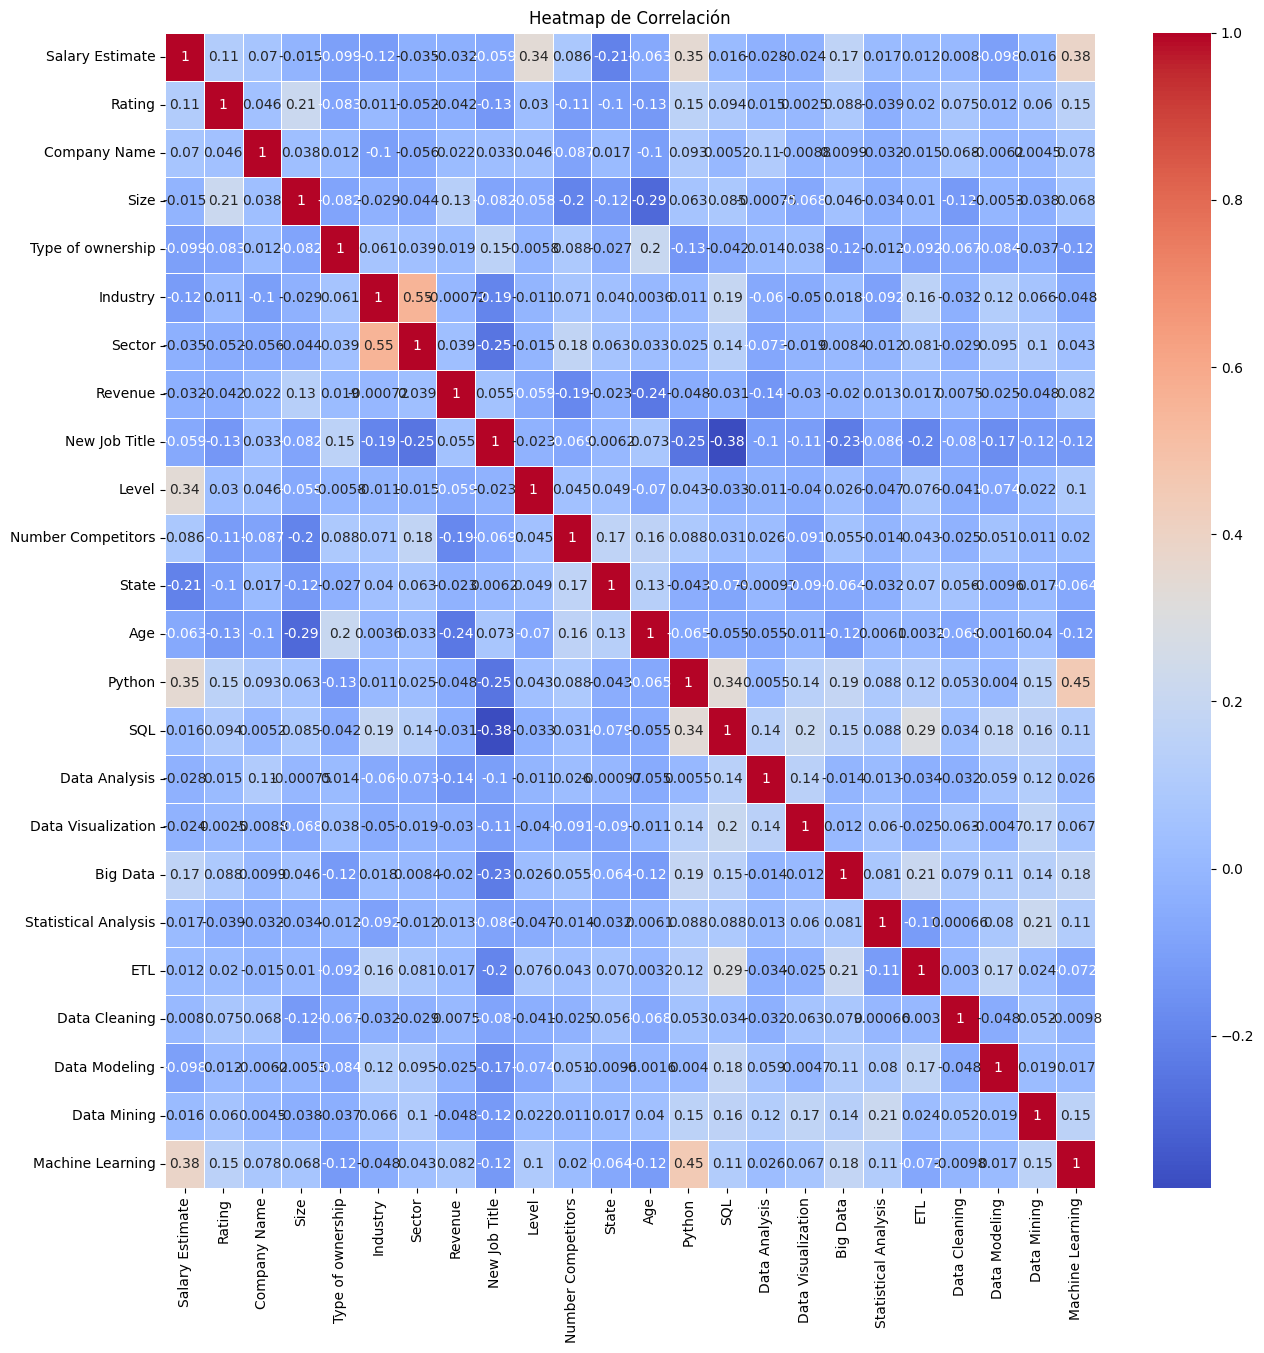

In [262]:
correlation_matrix = encoded_df.corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlación')
plt.show()

## C. Características Importantes

Columnas que impactan en el salario:

- Rating
- Company Name
- Type of Ownership
- Industry
- Job Title
- Level
- Number Competitors
- State
- Age
- Python
- Big Data
- Data Modeling
- Machine Learning

# **9. Normalización de Datos**

---

In [264]:
normalized_df = encoded_df.copy()

## A. Normalización Min-Max Scaling

In [265]:
scaler = MinMaxScaler()

columns = ["Salary Estimate", "Rating", "Company Name", "Type of ownership", "Industry", "New Job Title", "Level", "Number Competitors", "State", "Age", "Python", "Big Data", "Data Modeling", "Machine Learning"]
scaled_data = scaler.fit_transform(normalized_df[columns])
scaled_df = pd.DataFrame(scaled_data, columns = columns)
scaled_data

array([[0.23689727, 0.56521739, 0.86458333, ..., 0.        , 0.        ,
        1.        ],
       [0.30188679, 0.39130435, 0.93055556, ..., 0.        , 0.        ,
        1.        ],
       [0.29140461, 1.        , 0.49305556, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.36477987, 0.82608696, 0.32986111, ..., 1.        , 1.        ,
        1.        ],
       [0.24318658, 0.04347826, 0.80208333, ..., 0.        , 0.        ,
        1.        ],
       [0.32704403, 0.47826087, 0.73958333, ..., 0.        , 0.        ,
        1.        ]])

## B. Normalización Z-Score (No se usó)

In [141]:
scaler = StandardScaler()

columns = ["Salary Estimate", "Rating", "Company Name", "Type of ownership", "Industry", "New Job Title", "Level", "Number Competitors", "State", "Age", "Python", "Big Data", "Data Modeling", "Machine Learning"]
scaled_data = scaler.fit_transform(normalized_df[columns])
scaled_df = pd.DataFrame(scaled_data, columns = columns)
scaled_data

array([[-0.74784174,  0.10220916,  1.24328282, ..., -0.49633311,
        -0.3373514 ,  1.10423315],
       [-0.34380417, -0.64879231,  1.47669158, ..., -0.49633311,
        -0.3373514 ,  1.10423315],
       [-0.40897152,  1.97971285, -0.07117702, ...,  2.01477593,
         2.96426808,  1.10423315],
       ...,
       [ 0.04719994,  1.22871137, -0.64855657, ...,  2.01477593,
         2.96426808,  1.10423315],
       [-0.70874133, -2.15079526,  1.02215874, ..., -0.49633311,
        -0.3373514 ,  1.10423315],
       [-0.18740252, -0.27329157,  0.80103465, ..., -0.49633311,
        -0.3373514 ,  1.10423315]])

# **10. División de Datos**

___

## A. Dividir datos en Test y Train

In [270]:
train_data, test_data = train_test_split(scaled_df, test_size = 0.2, random_state = 80)

print("Cantidad de datos para entrenamiento son {} ({}%) y para test son {} ({}%).".format(
    len(train_data), round(len(train_data) / len(scaled_df), 4),
    len(test_data), round(len(test_data) / len(scaled_df), 4)
    )
)

Cantidad de datos para entrenamiento son 477 (0.799%) y para test son 120 (0.201%).


## B. Dividir Variables de Entrada y Salida

In [271]:
x_train = train_data.drop("Salary Estimate", axis = 1)
y_train = train_data["Salary Estimate"]

x_test = test_data.drop("Salary Estimate", axis = 1)
y_test = test_data["Salary Estimate"]

# **11. Implementación de Modelos**

---

## A. Regresión Polinomial

### A.1. Asignar Grado

In [272]:
poly = PolynomialFeatures(degree = 2)

### A.2. Asignar Datos

In [273]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
y_train_poly = y_train
y_test_poly = y_test

### A.3. Crear Modelo

In [274]:
model_poly = LinearRegression(fit_intercept = True)

### A.4. Entrenar Modelo

In [275]:
model_poly.fit(x_train_poly, y_train_poly)

LinearRegression()

### A.5. Predecir Valores

In [276]:
y_predict_poly = model_poly.predict(x_test_poly)

## B. Árbol de Decisión

### B.1. Crear Modelo

In [278]:
model_tree = DecisionTreeRegressor(max_depth = 8, min_samples_split = 3, min_samples_leaf = 4)

### B.2. Entrenar Modelo

In [279]:
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=3)

### B.3. Predecir Valores

In [280]:
y_predict_tree = model_tree.predict(x_test)

## C. Random Forest

### C.1. Crear Modelo

In [282]:
model_rf = RandomForestRegressor(n_estimators = 500, random_state = 90, max_depth = 8, min_samples_split = 3, min_samples_leaf = 4)

### C.2. Entrenar Modelo

In [283]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=3,
                      n_estimators=500, random_state=90)

### C.3. Predecir Valores

In [284]:
y_predict_rf = model_rf.predict(x_test)

## D. SVM

### D.1. Crear Modelo

In [285]:
model_svm = SVR(kernel = "sigmoid", C = 0.1, gamma = 0.1, epsilon = 0.01)

### D.2. Entrenar Modelo

In [286]:
model_svm.fit(x_train, y_train)

SVR(C=0.1, epsilon=0.01, gamma=0.1, kernel='sigmoid')

### D.3. Predecir Valores

In [287]:
y_predict_svm = model_svm.predict(x_test)

## E. MLP

### E.1. Crear Modelo

In [288]:
model_mlp = Sequential()
model_mlp.add(Dense(13, activation = "relu", input_dim = x_train.shape[1]))
model_mlp.add(Dense(11, activation = "relu")) #
model_mlp.add(Dense(9, activation = "relu"))
model_mlp.add(Dense(7, activation = "relu")) #
model_mlp.add(Dense(5, activation = "relu"))
model_mlp.add(Dense(3, activation = "relu")) #
model_mlp.add(Dense(2, activation = "relu")) #
model_mlp.add(Dense(1))

model_mlp.compile(optimizer = "adam", loss = "mean_squared_error")
model_mlp.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             154 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 583 (2.28 KB)

 Trainable params: 583 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

### E.2. Entrenar Modelo

In [289]:
model_mlp.fit(x_train, y_train, epochs = 1000, batch_size = 40, verbose = 2)

Epoch 1/1000
12/12 - 2s - 190ms/step - loss: 0.1308
Epoch 2/1000
12/12 - 0s - 4ms/step - loss: 0.0934
Epoch 3/1000
12/12 - 0s - 4ms/step - loss: 0.0569
Epoch 4/1000
12/12 - 0s - 4ms/step - loss: 0.0301
Epoch 5/1000
12/12 - 0s - 4ms/step - loss: 0.0251
Epoch 6/1000
12/12 - 0s - 5ms/step - loss: 0.0232
Epoch 7/1000
12/12 - 0s - 4ms/step - loss: 0.0223
Epoch 8/1000
12/12 - 0s - 5ms/step - loss: 0.0215
Epoch 9/1000
12/12 - 0s - 4ms/step - loss: 0.0206
Epoch 10/1000
12/12 - 0s - 4ms/step - loss: 0.0198
Epoch 11/1000
12/12 - 0s - 4ms/step - loss: 0.0192
Epoch 12/1000
12/12 - 0s - 4ms/step - loss: 0.0186
Epoch 13/1000
12/12 - 0s - 4ms/step - loss: 0.0180
Epoch 14/1000
12/12 - 0s - 5ms/step - loss: 0.0175
Epoch 15/1000
12/12 - 0s - 6ms/step - loss: 0.0170
Epoch 16/1000
12/12 - 0s - 5ms/step - loss: 0.0166
Epoch 17/1000
12/12 - 0s - 4ms/step - loss: 0.0162
Epoch 18/1000
12/12 - 0s - 5ms/step - loss: 0.0160
Epoch 19/1000
12/12 - 0s - 4ms/step - loss: 0.0156
Epoch 20/1000
12/12 - 0s - 5ms/step - 

### E.3. Predecir Valores

In [290]:
y_predict_mlp = model_mlp.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


# **12. Evaluación de Modelos**

---

## A. Regresión Polinomial

In [291]:
mse_poly = mean_squared_error(y_test_poly, y_predict_poly)
r2_poly = r2_score(y_test_poly, y_predict_poly)

print("Polynomial Regression")
print("MSE: {} \n R2: {}".format(mse_poly, r2_poly))

Polynomial Regression
MSE: 0.015556502026036466 
 R2: 0.39835949228149403


## B. Árbol de Decisión

In [292]:
mse_tree = mean_squared_error(y_test, y_predict_tree)
r2_tree = r2_score(y_test, y_predict_tree)

print("Decision Tree")
print("MSE: {} \n R2: {}".format(mse_tree, r2_tree))

Decision Tree
MSE: 0.014615082233633662 
 R2: 0.4347684665438001


## C. Random Forest

In [293]:
mse_rf = mean_squared_error(y_test, y_predict_rf)
r2_rf = r2_score(y_test, y_predict_rf)

print("Random Forest")
print("MSE: {} \n R2: {}".format(mse_rf, r2_rf))

Random Forest
MSE: 0.010249773906622834 
 R2: 0.6035947434160028


## D. SVM

In [294]:
mse_svm = mean_squared_error(y_test, y_predict_svm)
r2_svm = r2_score(y_test, y_predict_svm)

print("Support Vector Machine")
print("MSE: {} \n R2: {}".format(mse_svm, r2_svm))

Support Vector Machine
MSE: 0.02077461052461976 
 R2: 0.19655156392050788


## E. MLP

In [295]:
mse_mlp = mean_squared_error(y_test, y_predict_mlp)
r2_mlp = r2_score(y_test, y_predict_mlp)

print("Multilayer Perceptron")
print("MSE: {} \n R2: {}".format(mse_mlp, r2_mlp))

Multilayer Perceptron
MSE: 0.015548840298245103 
 R2: 0.39865580605374706


## F. Comparación

Se puede observar que el "Random Forest" obtuvo mejores resultados en comparación a los otros, el "SVM" fue el que peor resultados dio; y los demas están muy parejos.

| Modelo | MSE | R2 |
|-----------|-----------|-----------|
| Polynomial Regression | 0.0155565 | 0.3983594 |
| Decision Tree | 0.0147013| 0.4314318 |
| Random Forest | 0.0102497 | 0.6035947 |
| Support Vector Machine | 0.0207746 | 0.1965515 |
| Multilayer Perceptron | 0.0155488 | 0.3986558 |